<a href="https://colab.research.google.com/github/bkn872/GL_Guru_Nov22/blob/SL_SVM/svrSalesPrediction_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sales Prediction data

In [2]:
!pip


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper command used for command completion.
  debug                   

In [6]:
# Support Vector Regression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [27]:
from sklearn.model_selection import train_test_split

In [40]:
#from sklearn.cross_validation import train_test_split
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [9]:
# Importing the dataset

data = pd.read_csv('/content/drive/My Drive/20_GRP4_Nov22A/03_Supervised_Learning/W4_SVM/Mentor/Advertising.csv')

In [10]:
data.shape

(200, 5)

In [11]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [13]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


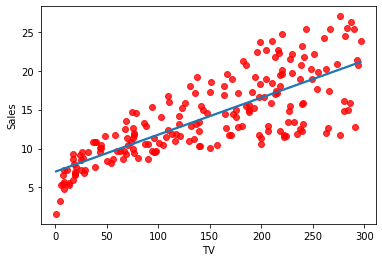

In [14]:
sns.regplot(data.TV, data.Sales, order=1, ci=None, scatter_kws={'color':'r'})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


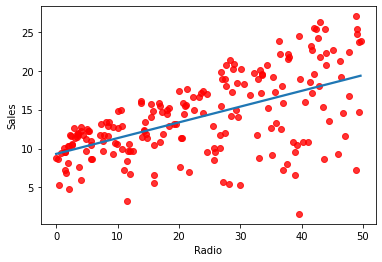

In [15]:
sns.regplot(data.Radio, data.Sales, order=1, ci=None, scatter_kws={'color':'r'})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


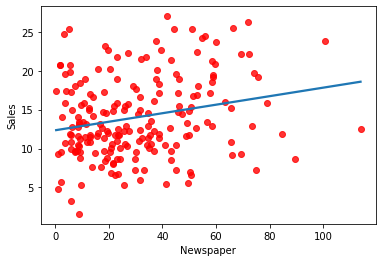

In [16]:
sns.regplot(data.Newspaper, data.Sales, order=1, ci=None, scatter_kws={'color':'r'})

# Multiple Linear Regression

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [18]:
regr = LinearRegression()

X = data[['TV']]
y = data[['Sales']]

In [19]:
regr.fit(X,y)

LinearRegression()

In [20]:
Sales_pred = regr.predict(X)

In [21]:
print("The R2 score for UVLR is %f" % (r2_score(y, Sales_pred))) 

The R2 score for UVLR is 0.611875


In [22]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data[['Sales']]

In [23]:
regr.fit(X,y)

LinearRegression()

In [24]:
Sales_pred = regr.predict(X)

In [25]:
print("The R2 score for MVLR is %f" % (r2_score(y, Sales_pred))) 

The R2 score for MVLR is 0.897211


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [29]:
regr.fit(X_train, y_train)

LinearRegression()

In [30]:
Sales_pred = regr.predict(X_test)

In [32]:
print("The R2 score for MVLR is %f" % (r2_score(y_test, Sales_pred))) 

The R2 score for MVLR is 0.907066


# SVR

In [33]:
# Fitting the SVR model to the dataset
regressor = SVR(kernel = 'linear')
regressor.fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [34]:
# Predicting a new result with the Support Vector Regression 
y_Pred = regressor.predict(X)

In [35]:
print("The R2 score for SVR is %f" % (r2_score(y, regressor.predict(X)))) 

The R2 score for SVR is 0.891620


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [37]:
# Fitting the SVR model to the dataset
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [38]:
y_Pred = regressor.predict(X_test)

In [39]:
print("The R2 score for SVR is %f" % (r2_score(y_test, regressor.predict(X_test)))) 

The R2 score for SVR is 0.913743
